## OpenCV
Curso: Aplicaciones del aprendizaje automático con Python<br>
Actividad 2: Iniciando con OpenCV <br> <br>
En esta actividad nos familiarizaremos con la biblioteca openCV.

Objetivos:
1. Leer iuna imagen
2. Desplegar una imagen con matplotlib
3. Aplicar procesamiento a una imagen.
4. Guardar una imagen nueva.

Alumno: Manuel de Jesus Rios Guardado - 17130110

Dra. Jessica Beltrán Márquez <br>
www.jessicabeltran.net

Lo primero que tenemos que hacer es importar las bibliotecas que vamos a necesitar.

- cv2: Es la biblioteca openCv
- numpy: Es una biblioteca que se utiliza para realizar operaciones numéricas.
- matplotlib: Es una librería que se utiliza para graficar en jupyter.

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
cv2.__version__

'4.5.2'

Con cv2.__version__ podemos conocer la versión de openCV que estamos usando

## Leer una imagen
A continuacion leeremos una imagen usando la función *imread* dentro de openCV.

La imagen *dog1* esta almacenada en la carpeta *images*.

También vamos a mostrar cual es la forma de la imagen (*shape*) usando la función shape.

In [3]:
img = cv2.imread('./images/dog1.jpg')
imgShape = img.shape
print(imgShape)

(400, 400, 3)


## Desplegar una imagen
Ahora vamos a desplegar la imagen utilizando la función *pyplot --> plt* contenidda en la biblioteca matplotlib.

Nota: Matplotlib utiliza un esquema de colores distinto a RGB (usa BGR), por tal motivo utilizamos la linea img = img[:,:,::-1]. Puedes comentar esta linea usando "#" para ver lo que sucede.  

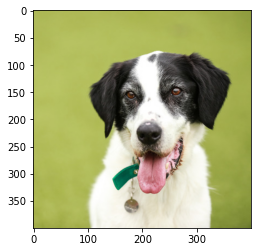

In [7]:
img = img[:,:,::-1]   #Esto porque matplotlib utiliza BGR en vez de RGB
plt.imshow(img)     
plt.show()

## Aplicar procesamiento a una imagen
Lo siguiente que haremos es aplicar un filtro llamado filtro Canny. Este filtro requiere recibir la imagen original y 2 valores que corresponden a umbrales. Puedes conocer más de esta función en http://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html

También vamos a desplegar la imagen original y la imagen con el procesamiento usando la función subplot de matplotlib.

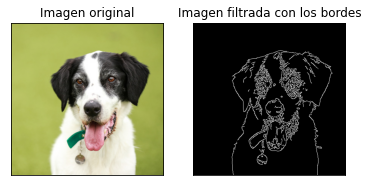

In [8]:
edgesImg = cv2.Canny(img,100,200)  #Se aplica el filtro Canny con umbrales 100 y 200 y se almacena en edgesImg
plt.subplot(121),plt.imshow(img,cmap = 'gray') #Se hace una subgráfica de la imagen original
plt.title('Imagen original'), plt.xticks([]), plt.yticks([]) #Se establece el título de la imagen y se especifíca que no se ponga información en los ejes
plt.subplot(122),plt.imshow(edgesImg,cmap = 'gray') #Se hace una subgráfica de la imagen filtrada con los bordes resultantes del filtro Canny
plt.title('Imagen filtrada con los bordes'), plt.xticks([]), plt.yticks([]) #Se establece el título de la imagen y se especifíca que no se ponga información en los ejes

plt.show()

## Guardar una imagen
Lo siguiente que haremos será guardar una nueva imagen en la carpeta *images*. Guardaremos la imagen procesada *edgesImg*.

In [9]:
cv2.imwrite('./images/dogEdges.jpg',edgesImg)  #Se especifica la ruta y nombre de la imagen. 

True

Ahora puedes ver en tu carpeta *images* la nueva imagen almacenada.

<span style="color:magenta">__Pruébalo__:</span> Utiliza el filtro CornerHarris https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris en vez de Canny.

Se requiere convertir la imagen a grises. Puedes probar con *cv2.cvtColor* antes de usar CornerHarris. 

Si usas los parámetros 3,3,0.01 tendrás una imagen como ésta:

<img src="./images/cornerHarris.png">

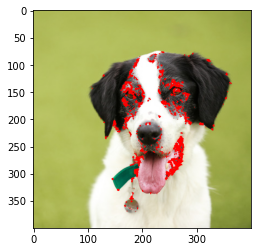

In [21]:
#Utiliza el filtro CornerHarris https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris en vez de Canny.
img = cv2.imread('./images/dog1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


dst = cv2.cornerHarris(gray, 3, 3, 0.01)
img[dst > 0.01 * dst.max()] = [0,0, 255]
img = img[:,:,::-1] 
plt.imshow(img)     
plt.show()

## Más cosas con openCv
Lo siguiente que haremos es sumar la imagen *dog1* con una nueva imagen *dog2*. Para esto leemos la imagen y revisamos si la forma de ambas imágenes es la misma. Si no es la misma forma, entonces modificamos la forma usando la función *resize*.

Forma de la imagen original=  (1920, 1920, 3)


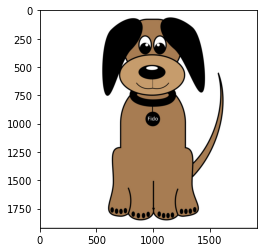

Forma de la imagen despues del resize =  (400, 400, 3)


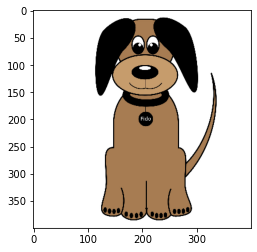

In [10]:
img2 = cv2.imread('./images/dog2.jpg')  #Se lee la imagen
img2Shape = img2.shape                   #Se obtiene su forma
print("Forma de la imagen original= ",img2Shape)  #Se imprime su forma
img2 = img2[:,:,::-1]   #Esto porque matplotlib utiliza BGR en vez de RGB
plt.imshow(img2)     #Se grafica 
plt.show()

img2Resized = cv2.resize(img2, (400, 400)) #Se modifica a 400,400 ya que es la forma de la imagen dog1
img2ResizedShape = img2Resized.shape
print("Forma de la imagen despues del resize = ",img2ResizedShape)
plt.imshow(img2Resized)     
plt.show()

Lo siguiente que hacemos es sumar ambas imágenes y posteriormete desplegarlas.

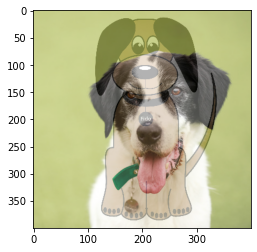

In [11]:
#imagenMezclada = cv2.add(img,img2Resized)
imagenMezclada = cv2.addWeighted(img,0.7,img2Resized,0.3,0)
plt.imshow(imagenMezclada)     
plt.show()

Observa que pasa si descomentas la linea *imagenMezclada = cv2.addWeighted(img,0.7,img2Resized,0.3,0)*  y comentas la linea *imagenMezclada = cv2.add(img,img2Resized)*. 

Para más información sobre que sucede puedes leer aquí http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics